<a href="https://colab.research.google.com/github/kdmid/Class_Python/blob/main/Practice/Seaborn_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. seaborn + matplotlib

seaborn을 matplotlib과 섞어쓰는 방법  
seaborn 함수 중 matplotlib axes를 반환하는 함수들에 관한 내용  
[seaborn API](https://seaborn.pydata.org/api.html)

## 1.1. Load data

예제로 사용할 펭귄 데이터를 불러옵니다.
seaborn에 내장되어 있습니다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 1.2. `figure` and `axes`

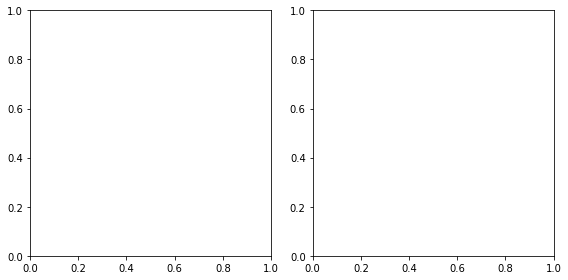

In [3]:
#matplotlib으로 도화지figure를 깔고 축공간axes를 만듭니다.

fig, axes = plt.subplots(ncols=2, figsize=(8,4)) #1 x 2 축공간을 구성합니다.

fig.tight_layout()

## 1.3. plot with matplotlib

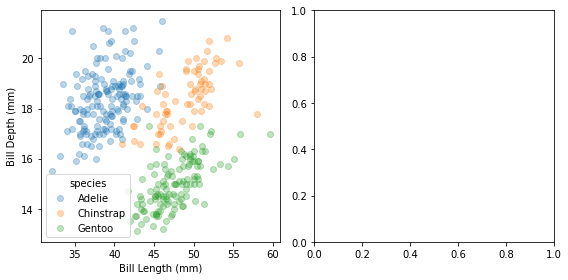

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4)) #1 x 2 축공간을 구성합니다.

species_u = penguins["species"].unique()

# plot 0 : matplotlib으로 산점도 그리기
for i, s in enumerate(species_u):  #종species별로 분리
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s], #x축은 부리 길이 bill length
                   penguins["bill_depth_mm"].loc[penguins["species"]==s],   #y축은 부리 위 아래 두께 bill depth
                   c=f"C{i}", label=s, alpha=0.3    #색상은 종species
                  )
axes[0].legend(species_u, title="species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

fig.tight_layout()

## 1.4. plot with seaborn

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


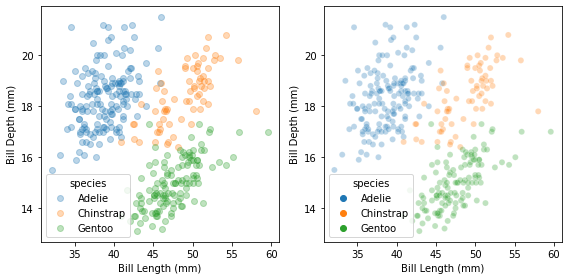

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4)) #1 x 2 축공간을 구성합니다.

species_u = penguins["species"].unique()

# plot 0 : matplotlib으로 산점도 그리기
for i, s in enumerate(species_u):  #종species별로 분리
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s], #x축은 부리 길이 bill length
                   penguins["bill_depth_mm"].loc[penguins["species"]==s],   #y축은 부리 위 아래 두께 bill depth
                   c=f"C{i}", label=s, alpha=0.3    #색상은 종species
                  )
axes[0].legend(species_u, title="species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

# plot 1 : seaborn으로 같은 그래프 그리기
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.3, ax=axes[1])
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

fig.tight_layout()

## 1.5. matplotlib + seaborn & seaborn + matplotlib

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

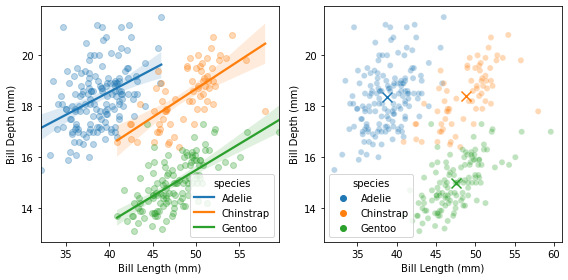

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

species_u = penguins["species"].unique()

# plot 0 : matplotlib + seaborn
for i, s in enumerate(species_u):
    # matplotlib 산점도
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s],
                   penguins["bill_depth_mm"].loc[penguins["species"]==s],
                   c=f"C{i}", label=s, alpha=0.3
                  )
				  
    # seaborn 추세선
    sns.regplot("bill_length_mm", "bill_depth_mm", data=penguins.loc[penguins["species"]==s], 
                scatter=False, ax=axes[0])
    
axes[0].legend(species_u, title="species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

# plot 1 : seaborn + matplotlib
# seaborn 산점도
sns.scatterplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.3, ax=axes[1])
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

for i, s in enumerate(species_u):
    # matplotlib 중심점
    axes[1].scatter(penguins["bill_length_mm"].loc[penguins["species"]==s].mean(),
                   penguins["bill_depth_mm"].loc[penguins["species"]==s].mean(),
                   c=f"C{i}", alpha=1, marker="x", s=100
                  )

fig.tight_layout()

## 1.6. seaborn + seaborn + matplotlib

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


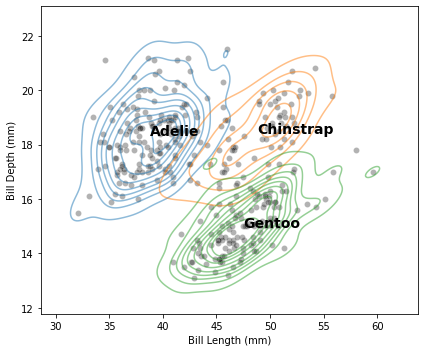

In [7]:
fig, ax = plt.subplots(figsize=(6,5))

# plot 0: scatter plot
sns.scatterplot("bill_length_mm", "bill_depth_mm", color="k", data=penguins, alpha=0.3, ax=ax, legend=False)

# plot 1: kde plot
sns.kdeplot("bill_length_mm", "bill_depth_mm", hue="species", data=penguins, alpha=0.5, ax=ax, legend=False)

# text:
species_u = penguins["species"].unique()
for i, s in enumerate(species_u):
    ax.text(penguins["bill_length_mm"].loc[penguins["species"]==s].mean(),
            penguins["bill_depth_mm"].loc[penguins["species"]==s].mean(),
            s = s, fontdict={"fontsize":14, "fontweight":"bold","color":"k"}
            )

ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")

fig.tight_layout()

# 2. seaborn + matplotlib을 이용한 jointplot 보완

## 2.3. matplotlib + seaborn

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")  # 펭귄 데이터셋으로 시작합니다.
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seab

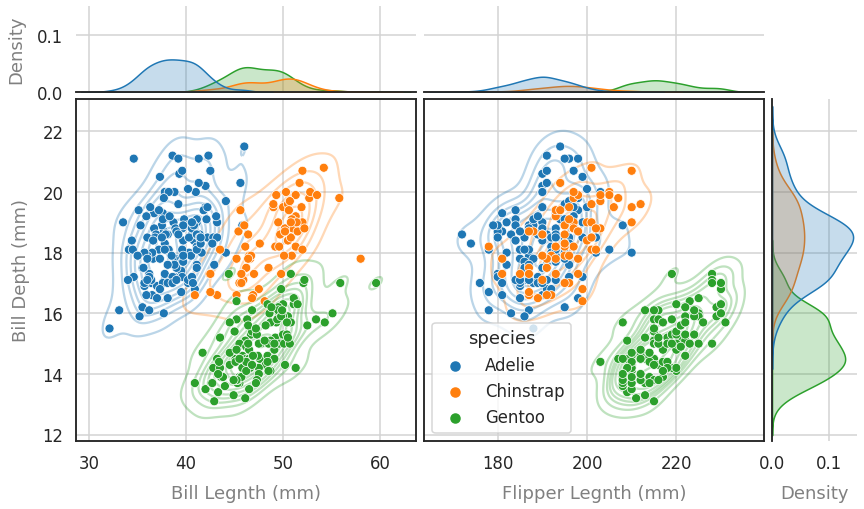

In [17]:
sns.set_style("white")
sns.set_context("talk")

fig = plt.figure(figsize=(14,8))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights, 
                        wspace=0.03, hspace=0.03)  # setting spaces

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3], zorder=1, legend=False)

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3], zorder=2, legend=False)

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False, zorder=1, fill=True)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False, zorder=1, fill=True)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

### 4. flipper_length_mm vs bill_depth_mm
# 4.1. kdeplot
sns.kdeplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[4], zorder=1)

# 4.2. scatterplot
sns.scatterplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[4], zorder=2)

# 4.3. histogram (flipper_length_mm)
sns.kdeplot("flipper_length_mm", data=penguins, hue="species", ax=axs[1], legend=False, zorder=1, fill=True)
axs[1].set_xlim(axs[4].get_xlim())
axs[1].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

### 5. unnecessary elements removal
# 5.1. upper-right axes
axs[2].axis("off")

# 5.2. margin kdeplot scale unification
hist_range_max = max(axs[0].get_ylim()[-1], axs[1].get_ylim()[-1], axs[5].get_xlim()[-1])
for i in range(len(widths)-1):
    axs[i].set_ylim(0, hist_range_max)
axs[5].set_xlim(0, hist_range_max)

# 5.3. redundent labels and titles removal
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[4].set_yticklabels([])
axs[4].set_ylabel('')

# 5.4. grids
for i in range(len(heights)*len(widths)):
    axs[i].grid("on", color="lightgray", zorder=0)
    
# 5.5. labels
font_label = {"color":"gray"}
axs[3].set_xlabel("Bill Legnth (mm)", fontdict=font_label, labelpad=12)
axs[3].set_ylabel("Bill Depth (mm)", fontdict=font_label, labelpad=12)
axs[4].set_xlabel("Flipper Legnth (mm)", fontdict=font_label, labelpad=12)
axs[0].set_ylabel("Density", fontdict=font_label, labelpad=12)
axs[5].set_xlabel("Density", fontdict=font_label, labelpad=12)


fig.tight_layout()

# 3. seaborn `figure-level` function

## 3.1. figure-level 편리함 맛보기: FacetGrid()

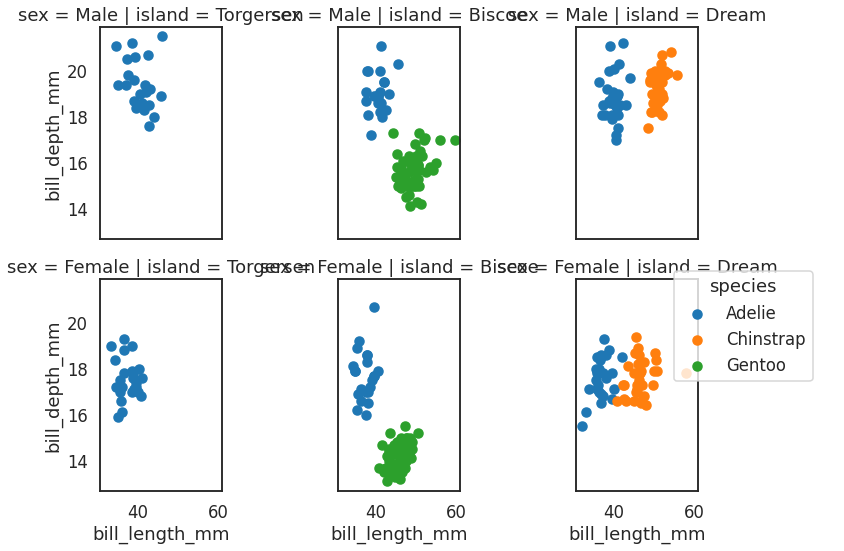

In [22]:
# matplotlib 코드
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)

# 인자별 데이터 종 수 세기
sex = penguins["sex"].dropna().unique()
island = penguins["island"].dropna().unique()
species = penguins["species"].dropna().unique()

# X방향 axes: sex
for i in range(len(sex)): 
    # Y방향 axes: island
    for j in range(len(island)):
        # 색상 : species
        for k in range(len(species)):
            try:
                axes[i][j].scatter(penguins.loc[penguins["sex"] == sex[i]].loc[penguins["island"] == island[j]].loc[penguins["species"] == species[k]]["bill_length_mm"], 
                                   penguins.loc[penguins["sex"] == sex[i]].loc[penguins["island"] == island[j]].loc[penguins["species"] == species[k]]["bill_depth_mm"])
                axes[i][j].set_title(f"sex = {sex[i]} | island = {island[j]}")
            except:  # 결측치 예외처리
                pass
		
        # 맨 아래줄에만 xlabel 추가
        axes[len(sex)-1, j].set_xlabel("bill_length_mm")

    # 맨 왼쪽에만 ylabel 추가
    axes[i, 0].set_ylabel("bill_depth_mm")

# 그래프 우측에 범례 표시
fig.legend(species,  title="species", bbox_to_anchor=(0.95, 0.5))

# 그래프 간격 조정
fig.tight_layout(rect=[0,0,0.85,1])

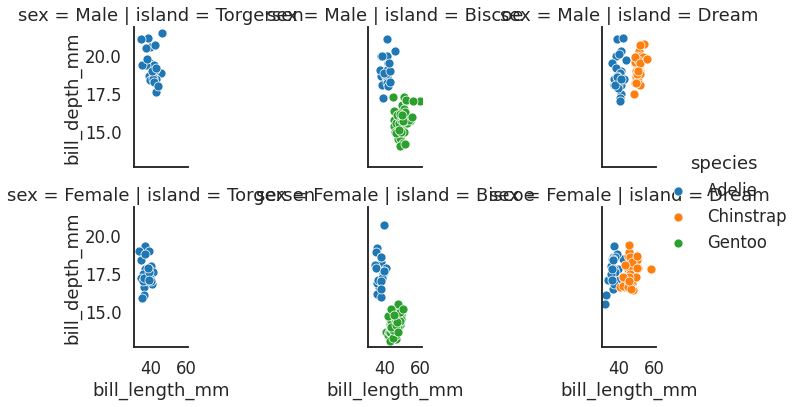

In [23]:
# seaborn을 사용하면 세 줄 만에 끝납니다
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.scatterplot, "bill_length_mm", "bill_depth_mm")
g.add_legend()

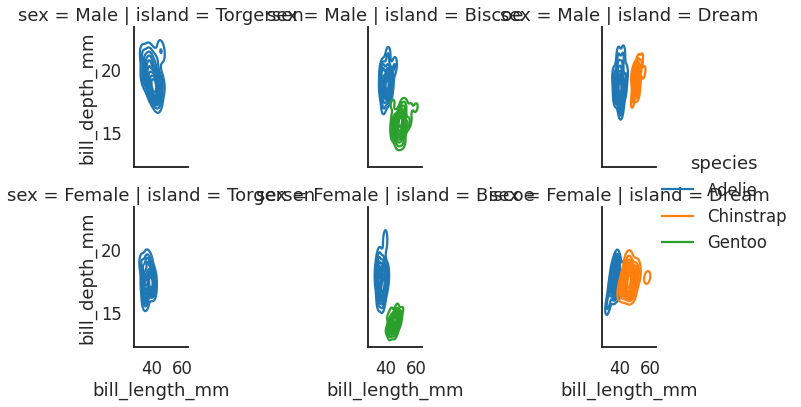

In [24]:
# 밀도 함수density plot로 바꾸는 것도 간단
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm")
g.add_legend()

## 3.2. figure-level 꾸미기: FacetGrid()
- kdeplot위에 추세선을 겹쳐 그립니다.
    - 추세선이 중간에 안끊기면 좋겠습니다.
    - 신뢰구간은 80% 수준으로 그리고 싶습니다.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


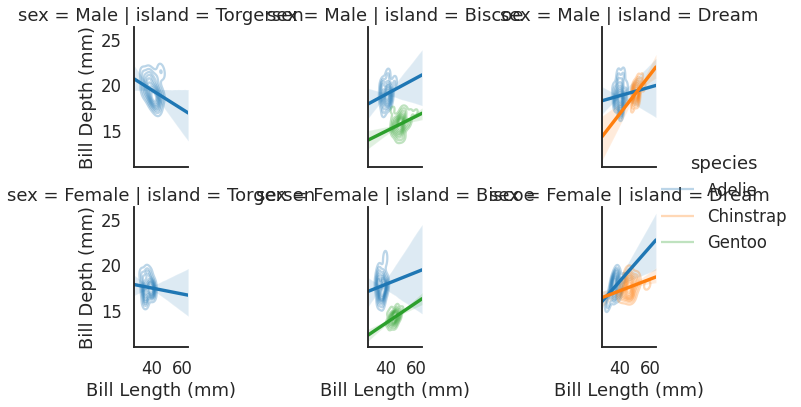

In [25]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species")
g.map(sns.kdeplot, "bill_length_mm", "bill_depth_mm", alpha=0.3)
g.map(sns.regplot, "bill_length_mm", "bill_depth_mm", truncate=False, ci=80, scatter=False)

g.set_axis_labels("Bill Length (mm)", "Bill Depth (mm)")
g.add_legend()

# 4. seaborn `figure-level` 다듬기

## 4.1. `figure-level`으로 편리하게 그리기: `pairplot()`

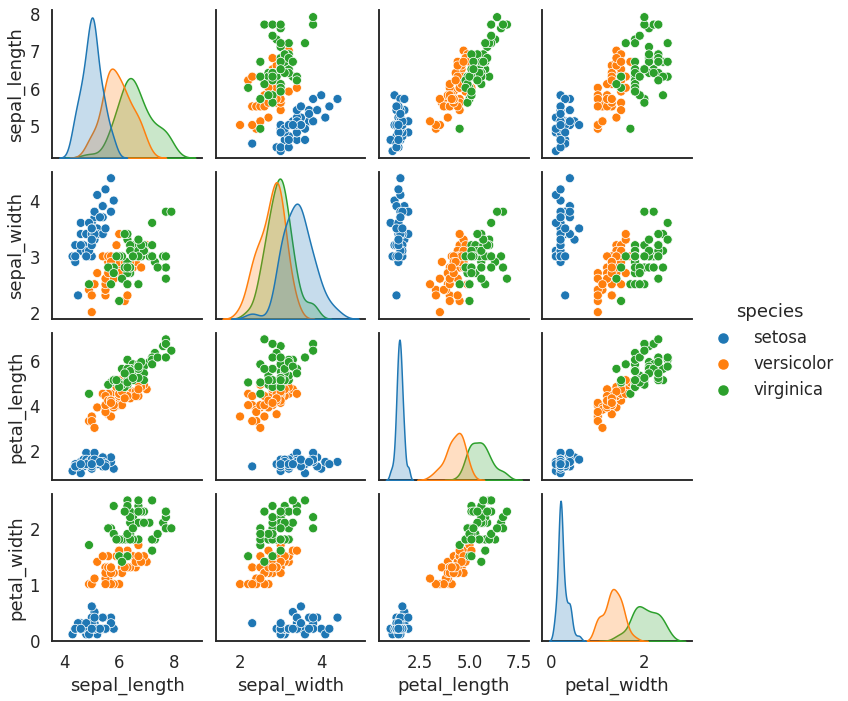

In [27]:
import seaborn as sns

iris = sns.load_dataset("iris")

g = sns.pairplot(iris, hue="species")

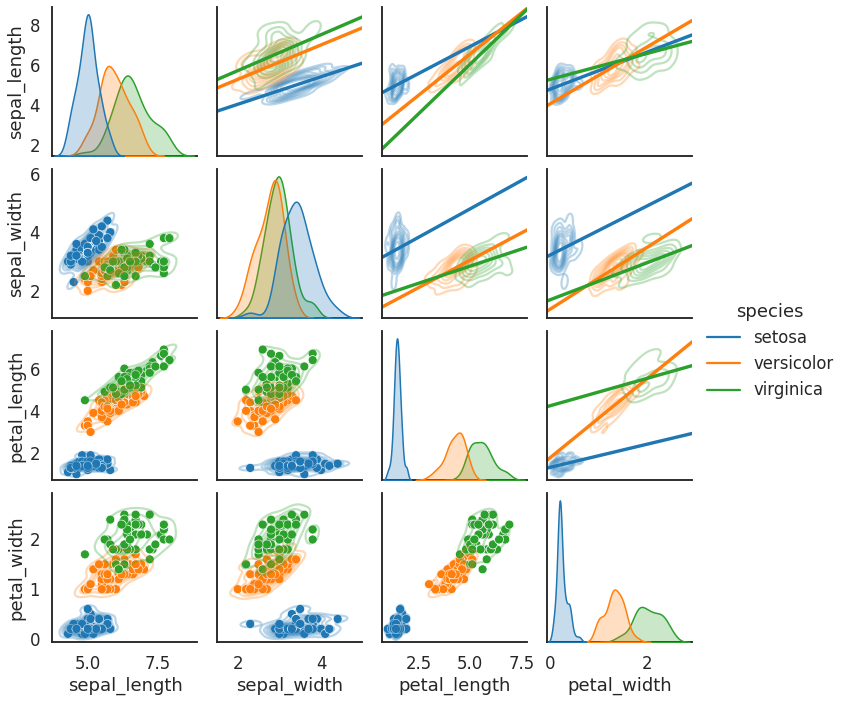

In [28]:
g = sns.pairplot(iris, hue="species", kind="kde", plot_kws={"alpha":0.3})
g.map_lower(sns.scatterplot)
g.map_upper(sns.regplot, scatter=False, truncate=False, ci=False)

## 4.2. `figure-level` 그림 뼈대부터 세우기: `PairGrid()`

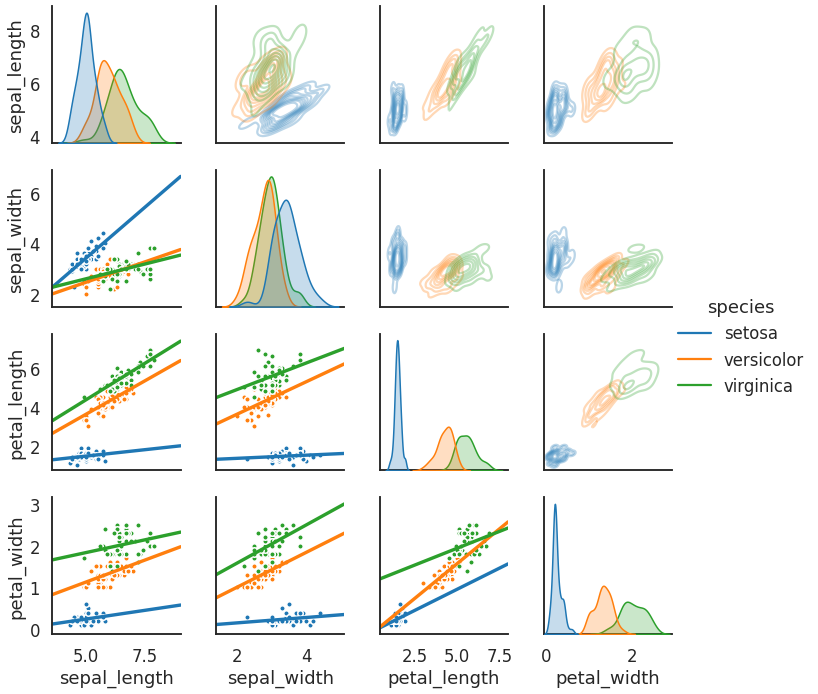

In [29]:
# 틀 만들기
g = sns.PairGrid(iris, hue="species", diag_sharey=False)

# diagonal
g.map_diag(sns.kdeplot, fill=True)

# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)

# upper
g.map_upper(sns.kdeplot, alpha=0.3)

# legend
g.add_legend()

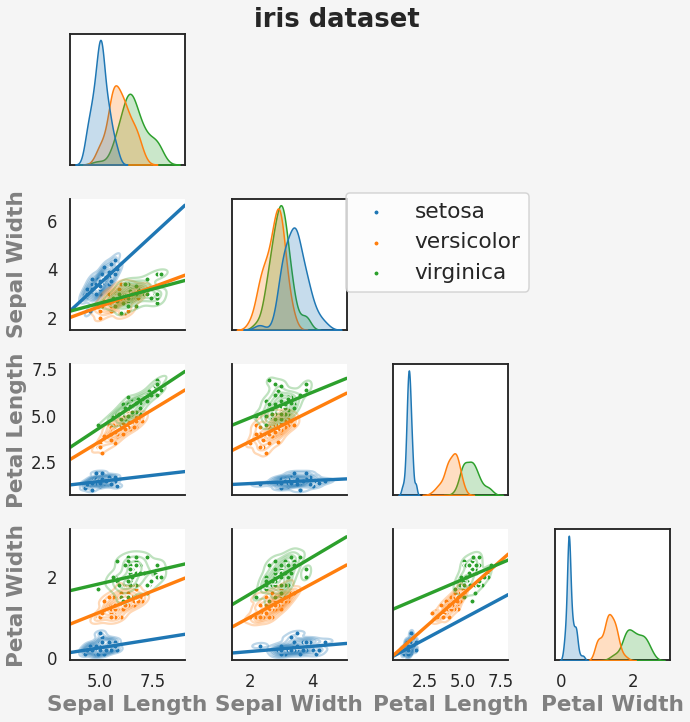

In [32]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)

# diagonal
g.map_diag(sns.kdeplot, fill=True)
for i in range(4):
    g.axes[i][i].spines["left"].set_visible(True)
    g.axes[i][i].spines["top"].set_visible(True)
    g.axes[i][i].spines["right"].set_visible(True)
    
# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)

# legend
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels,
             bbox_to_anchor=(0.75, 0.75),
             fontsize="large")

# x, y labels
labels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
font_labels = {"fontsize":"large", "color":"gray", "fontweight":"bold"}
for i in range(4):
    g.axes[3, i].set_xlabel(labels[i], fontdict=font_labels)
    g.axes[i, 0].set_ylabel(labels[i], fontdict=font_labels)

# ylabel alignment
g.fig.align_ylabels(g.axes[:,0])

# suptitle
g.fig.suptitle("iris dataset", y=1.01,
               weight="bold", fontsize="x-large"
              )
g.fig.tight_layout()

# facecolor
g.fig.set_facecolor("whitesmoke")